# Transpiration, ET, and Precipitation Analysis

In [3]:
import pandas as pd
import numpy as np
import xarray as xr
import datetime as dt
import glob
import os
from pathlib import Path
import HydroErr as he
import matplotlib.pyplot as plt
import hydrostats
import warnings as wg
from hydrostats.metrics import mae, r_squared, nse, kge_2012, rmse, pearson_r
import hydrostats.analyze as ha

wg.filterwarnings('ignore')

In [4]:
places = pd.read_csv(r'D:\Capstone\all_places_vegetation.csv')
#places

In [5]:
df = pd.read_csv(r'D:\Capstone\all_places_vegetation.csv')
df.sort_values(by='Best',inplace=True)
#df_p
#df_p

In [6]:
df_p = df.copy()
df_p.sort_values(by='Best',inplace=True,ascending=False)
df_p.reset_index(inplace=True)

In [8]:
def get_data(place,choice):
    nc_data = r'D:\Capstone\MODELS\{}\{}__CAPSTONE_{}_stomResist_{}_v2.0_timestep.nc'.format(place,place,place,choice)
    ds = xr.open_dataset(nc_data)
    Trans = ds['scalarCanopyTranspiration'].to_numpy()
    ET = ds['scalarTotalET'].to_numpy()
    idx = ds.coords['time'].to_numpy()
    
    dataset = pd.DataFrame(index=idx)
    name_tr, name_et = 'Transpiration_'+choice, 'ET_'+choice
    dataset[name_tr] = Trans.reshape(-1)
    dataset[name_et] = ET.reshape(-1)
    ds.close()
    return dataset

def get_annual(sdf,threshold=300):
    annual = sdf.resample('Y').sum()
    annual_count = sdf.resample('Y').count()
    col_annual = annual.columns.values
    col_annual0 = col_annual[0]
    annual_count['val'] = np.where((annual_count[col_annual0].ge(threshold)), 1, np.nan)
    
    df_anual = annual.join(annual_count, how='outer', rsuffix='c')
    
    for col in col_annual:
        df_anual[col] = df_anual[col] * df_anual['val']
    #df_anual.dropna()
    return df_anual



def process_data(place):
    ldf=[]
    choices = ['BallBerry','Jarvis','simpleResistance']
    for choice in choices:
        df = get_data(place,choice)
        ldf.append(df)
    sdf = pd.concat(ldf,axis=1)
    #print(sdf)
    annual = get_annual(sdf,300)
    
    annual['BallBerry'] = annual['Transpiration_BallBerry']/annual['ET_BallBerry']
    annual['Jarvis'] = annual['Transpiration_Jarvis']/annual['ET_Jarvis']
    annual['simpleResistance'] = annual['Transpiration_simpleResistance']/annual['ET_simpleResistance']
    
    annual_simple = annual[['BallBerry','Jarvis','simpleResistance']]
    return annual_simple,sdf


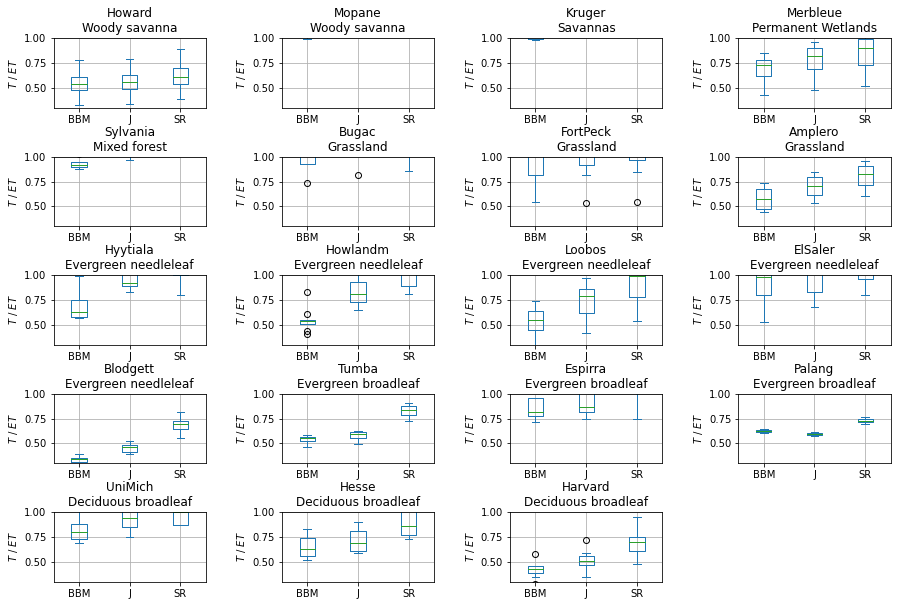

In [11]:
fig, axs = plt.subplots(5, 4, figsize=(15, 10), facecolor='w', edgecolor='k')
full_title = ''#place + ' - ' + ddvar + ' - ' + plant
fig.suptitle(full_title, fontsize="x-large")
fig.subplots_adjust(hspace=0.7, wspace=0.5)
axs = axs.ravel()
for i in range(0, 19):
    
    place=df_p.loc[df_p.index == i, 'folder'].iloc[0]
    place_plant =df_p.loc[df_p.index == i, 'Best'].iloc[0]

    fraction, add = process_data(place)
    fraction.plot(kind='box', ax=axs[i])#,labels=['BBM','J','SR'])
    axs[i].set_xticklabels(['BBM','J','SR'])
    axs[i].set_ylim(0.3,1)
    axs[i].set_title(place +'\n' + place_plant)
    axs[i].grid()
    axs[i].set_ylabel('$T$ / $ET$')

axs[19].set_axis_off()

plt.savefig(r'D:\Capstone\Plots\Figure5b_tex.png', dpi=300, bbox_inches='tight')

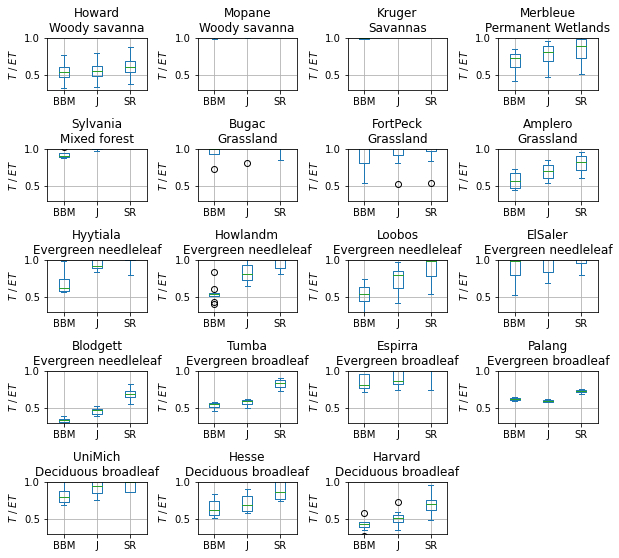

In [18]:
fig, axs = plt.subplots(5, 4, figsize=(8.5, 8), facecolor='w', edgecolor='k')
full_title = ''#place + ' - ' + ddvar + ' - ' + plant
fig.suptitle(full_title, fontsize="x-large")
fig.subplots_adjust(hspace=0.7, wspace=0.5)
axs = axs.ravel()
for i in range(0, 19):
    
    place=df_p.loc[df_p.index == i, 'folder'].iloc[0]
    place_plant =df_p.loc[df_p.index == i, 'Best'].iloc[0]

    fraction, add = process_data(place)
    fraction.plot(kind='box', ax=axs[i])#,labels=['BBM','J','SR'])
    axs[i].set_xticklabels(['BBM','J','SR'])
    axs[i].set_ylim(0.3,1)
    axs[i].set_title(place +'\n' + place_plant)
    axs[i].grid()
    axs[i].set_ylabel('$T$ / $ET$')

axs[19].set_axis_off()
fig.tight_layout()
plt.savefig(r'D:\Capstone\Plots\Figure5b_texb.png', dpi=300, bbox_inches='tight')

In [22]:

ds0 = xr.open_dataset(r'D:\Capstone\MODELS\ElSaler2\ElSaler2__CAPSTONE_ElSaler2_stomResist_BallBerry_v2.0_timestep.nc')
ds0

alfa=ds0['scalarTotalET'].to_numpy()

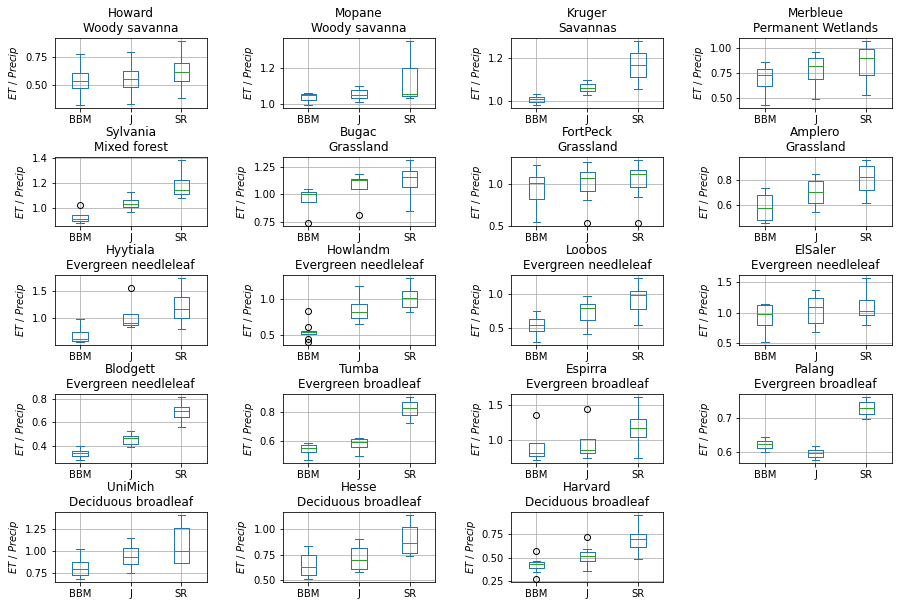

In [13]:
#Ajustar por signos

def get_data(place,choice):
    nc_data = r'D:\Capstone\MODELS\{}\{}__CAPSTONE_{}_stomResist_{}_v2.0_timestep.nc'.format(place,place,place,choice)
    ds = xr.open_dataset(nc_data)
    Trans = ds['scalarTotalET'].to_numpy()
    Trans = Trans *-1
    ET = ds['pptrate'].to_numpy()
    idx = ds.coords['time'].to_numpy()
    
    dataset = pd.DataFrame(index=idx)
    name_tr, name_et = 'Transpiration_'+choice, 'ET_'+choice
    dataset[name_tr] = Trans.reshape(-1)
    dataset[name_et] = ET.reshape(-1)
    ds.close()
    return dataset

def get_annual(sdf,threshold=300):
    annual = sdf.resample('Y').sum()
    annual_count = sdf.resample('Y').count()
    col_annual = annual.columns.values
    col_annual0 = col_annual[0]
    annual_count['val'] = np.where((annual_count[col_annual0].ge(threshold)), 1, np.nan)
    
    df_anual = annual.join(annual_count, how='outer', rsuffix='c')
    
    for col in col_annual:
        df_anual[col] = df_anual[col] * df_anual['val']
    #df_anual.dropna()
    return df_anual

def process_data(place):
    ldf=[]
    choices = ['BallBerry','Jarvis','simpleResistance']
    for choice in choices:
        df = get_data(place,choice)
        ldf.append(df)
    sdf = pd.concat(ldf,axis=1)
    #print(sdf)
    annual = get_annual(sdf,300)
    
    annual['BallBerry'] = annual['Transpiration_BallBerry']/annual['ET_BallBerry']
    annual['Jarvis'] = annual['Transpiration_Jarvis']/annual['ET_Jarvis']
    annual['simpleResistance'] = annual['Transpiration_simpleResistance']/annual['ET_simpleResistance']
    
    annual_simple = annual[['BallBerry','Jarvis','simpleResistance']]
    return annual_simple,sdf


fig, axs = plt.subplots(5, 4, figsize=(15, 10), facecolor='w', edgecolor='k')
full_title = ''#place + ' - ' + ddvar + ' - ' + plant
fig.suptitle(full_title, fontsize="x-large")
fig.subplots_adjust(hspace=0.7, wspace=0.5)
axs = axs.ravel()
for i in range(0, 19):
    
    place=df_p.loc[df_p.index == i, 'folder'].iloc[0]
    place_plant =df_p.loc[df_p.index == i, 'Best'].iloc[0]

    fraction, add = process_data(place)
    fraction.plot(kind='box', ax=axs[i])#,labels=['BBM','J','SR'])
    axs[i].set_xticklabels(['BBM','J','SR'])
    #axs[i].set_ylim(0.3,1)
    axs[i].set_title(place +'\n' + place_plant)
    axs[i].grid()
    axs[i].set_ylabel('$ET$ / $Precip$')

axs[19].set_axis_off()

plt.savefig(r'D:\Capstone\Plots\Figure6b_p.png', dpi=500, bbox_inches='tight')